# Distribution of Hospitals in Toronto¶


In [1]:
import requests # to handle requests
import pandas as pd # for data analsysis
import numpy as np # to handle data in a vectorized manner

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
#tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

## Creating Data Frame

In [3]:
from bs4 import BeautifulSoup
#collecting data from the website using soup object
src = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(src.text,'lxml')

In [4]:
table = soup.find(class_ = 'wikitable')
data = []
col = []
for i,tr in enumerate(table.find_all('tr')):
    section = []
    for j in tr.find_all(['th','td']):
        section.append(j.text.rstrip())
        
    if (i == 0):
        col = section
    else:
        data.append(section)

canada_df = pd.DataFrame(data = data,columns = col)
canada_df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


## Data Cleaning

In [5]:
# Ignore cells with a borough that is Not assigned.
ca_df = canada_df[canada_df.Borough != 'Not assigned']

#group by postcode and Borough, keeping all the Neighbourhoods.
ca_df=ca_df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(lambda x: ','.join(x.astype(str))).reset_index()
ca_df = ca_df.drop_duplicates()

ca_df1 = ca_df.loc[canada_df['Neighbourhood']== 'Not assigned']

 #replace Not assigned Neighbourhoods column values with values from Borough.
for i in ca_df1.index:
    ca_df1.at[i, 'Neighbourhood'] = ca_df1.at[i, 'Borough']

#replace rows in original DataFrame.
ca_df.loc[ca_df1.index] = ca_df1


ca_df

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,Scarborough
1,M1C,Scarborough,Scarborough
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,Scarborough
8,M1M,Scarborough,Scarborough
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [ ]:
!conda install geopandas

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    hdf4-4.2.13                |       h3ca952b_2         916 KB
    xerces-c-3.2.2             |       h780794e_0         3.2 MB
    giflib-5.1.4               |       h14c3975_1          78 KB
    libdap4-3.19.1             |       h6ec2957_0         1.5 MB
    kealib-1.4.7               |       hd0c454d_6         175 KB
    click-plugins-1.1.1        |             py_0          11 KB
    libkml-1.3.0               |       h590aaf7_4         633 KB
    openjpeg-2.3.0             |       h05c96fa_1         456 KB
    cligj-0.5.0                |           py36_0          12 KB
    freexl-1.0.5               |       h14c3975_0          44 KB
    rtree-0.8.3                |           py36_0          46 KB


In [7]:
#read and load geographical locations of Toronto postcodes.
pc_geo = pd.read_csv('https://cocl.us/Geospatial_data', header=0)
pc_geo.rename(columns={'Postal Code':'Postcode'}, inplace=True)

#merge postcodes list within Borough & Neigbourhood DataFrame.
pc_m_geo=pd.merge(ca_df,pc_geo, on='Postcode')

#print our updated DataFrame.
pc_m_geo

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,Scarborough,43.806686,-79.194353
1,M1C,Scarborough,Scarborough,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,Scarborough,43.711112,-79.284577
8,M1M,Scarborough,Scarborough,43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


In [8]:
CLIENT_ID = '1D0LR3021ZZXOX2H2MR3TVTFQJ0WAVQA4QAJH5RAFRCCRF03' # your Foursquare ID
CLIENT_SECRET = 'BNL2WM1OMXCQKBJIQXE3NPAYTIHIEFZPRT4A23YIBZTZBR0H' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1D0LR3021ZZXOX2H2MR3TVTFQJ0WAVQA4QAJH5RAFRCCRF03
CLIENT_SECRET:BNL2WM1OMXCQKBJIQXE3NPAYTIHIEFZPRT4A23YIBZTZBR0H


In [9]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.653963 -79.387207


In [10]:
categoryId = '4bf58dd8d48988d196941735' #category id for hospital
NEAR = 'Toronto,ON'
print(categoryId + " near " + NEAR + ' .... OK!')

4bf58dd8d48988d196941735 near Toronto,ON .... OK!


In [11]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&near={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, NEAR, categoryId)
url

'https://api.foursquare.com/v2/venues/search?client_id=1D0LR3021ZZXOX2H2MR3TVTFQJ0WAVQA4QAJH5RAFRCCRF03&client_secret=BNL2WM1OMXCQKBJIQXE3NPAYTIHIEFZPRT4A23YIBZTZBR0H&v=20180605&near=Toronto,ON&categoryId=4bf58dd8d48988d196941735'

In [49]:
results = requests.get(url).json()
venues = results['response']['venues']
results

{'meta': {'code': 200, 'requestId': '5dd35169aba2970028497d88'},
 'response': {'venues': [{'id': '4ad4c064f964a5206ef820e3',
    'name': 'The Hospital for Sick Children (SickKids)',
    'location': {'address': '555 University Ave.',
     'crossStreet': 'at Gerrard St.',
     'lat': 43.657498668962646,
     'lng': -79.3865121609307,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.657498668962646,
       'lng': -79.3865121609307}],
     'postalCode': 'M5G 1X8',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['555 University Ave. (at Gerrard St.)',
      'Toronto ON M5G 1X8',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1574130139',
    'hasP

In [50]:
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,hierarchy,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,NaN,4ad4c064f964a5206ef820e3,555 University Ave.,CA,Toronto,Canada,at Gerrard St.,"[555 University Ave. (at Gerrard St.), Toronto...","[{'label': 'display', 'lat': 43.65749866896264...",43.657499,-79.386512,M5G 1X8,ON,The Hospital for Sick Children (SickKids),v-1574130139,NaN
1,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,NaN,4fe2fe18e4b0311209fab0cb,1215 Wilson Avenue,CA,Toronto,Canada,NaN,"[1215 Wilson Avenue, Toronto ON M3M 0B2, Canada]","[{'label': 'display', 'lat': 43.7243374469061,...",43.724337,-79.488066,M3M 0B2,ON,Humber River Hospital,v-1574130139,NaN
2,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,NaN,4adb8e3bf964a520f22821e3,825 Coxwell Ave,CA,East York,Canada,Mortimer Ave,"[825 Coxwell Ave (Mortimer Ave), East York ON ...","[{'label': 'display', 'lat': 43.689573, 'lng':...",43.689573,-79.326173,M4C 3E7,ON,Michael Garron Hospital,v-1574130139,NaN
3,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,NaN,4ad797f6f964a520880c21e3,2075 Bayview Ave,CA,Toronto,Canada,at Blythwood Rd.,"[2075 Bayview Ave (at Blythwood Rd.), Toronto ...","[{'label': 'display', 'lat': 43.72150545991439...",43.721505,-79.376210,M4N 3N5,ON,Sunnybrook Health Sciences Centre,v-1574130139,NaN
4,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,NaN,4af0615cf964a5208cdb21e3,76 Grenville St.,CA,Toronto,Canada,at Bay St.,"[76 Grenville St. (at Bay St.), Toronto ON M5S...","[{'label': 'display', 'lat': 43.66149084521543...",43.661491,-79.387602,M5S 1B2,ON,Women's College Hospital,v-1574130139,NaN


In [15]:
dataframe.shape

(30, 18)

In [16]:
df_hospital = dataframe.drop(columns=['categories', 'hierarchy','hasPerk', 'referralId', 'venuePage.id'])

In [18]:
df_hospital['Postcode'] = df_hospital['location.postalCode'].str[:3]
df_hospital.head()

,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,Postcode
0,4ad4c064f964a5206ef820e3,555 University Ave.,CA,Toronto,Canada,at Gerrard St.,"[555 University Ave. (at Gerrard St.), Toronto...","[{'label': 'display', 'lat': 43.65749866896264...",43.657499,-79.386512,M5G 1X8,ON,The Hospital for Sick Children (SickKids),M5G
1,4fe2fe18e4b0311209fab0cb,1215 Wilson Avenue,CA,Toronto,Canada,NaN,"[1215 Wilson Avenue, Toronto ON M3M 0B2, Canada]","[{'label': 'display', 'lat': 43.7243374469061,...",43.724337,-79.488066,M3M 0B2,ON,Humber River Hospital,M3M
2,4adb8e3bf964a520f22821e3,825 Coxwell Ave,CA,East York,Canada,Mortimer Ave,"[825 Coxwell Ave (Mortimer Ave), East York ON ...","[{'label': 'display', 'lat': 43.689573, 'lng':...",43.689573,-79.326173,M4C 3E7,ON,Michael Garron Hospital,M4C
3,4ad797f6f964a520880c21e3,2075 Bayview Ave,CA,Toronto,Canada,at Blythwood Rd.,"[2075 Bayview Ave (at Blythwood Rd.), Toronto ...","[{'label': 'display', 'lat': 43.72150545991439...",43.721505,-79.376210,M4N 3N5,ON,Sunnybrook Health Sciences Centre,M4N
4,4ad4c064f964a52070f820e3,190 Elizabeth St,CA,Toronto,Canada,at Gerrard St W,"[190 Elizabeth St (at Gerrard St W), Toronto O...","[{'label': 'display', 'lat': 43.65876218215914...",43.658762,-79.388292,M5G 2C4,ON,Toronto General Hospital,M5G


In [20]:
df_hospi = pd.merge(df_hospital, pc_m_geo, how='left',
        left_on='Postcode', right_on='Postcode', validate="m:m")
df_hospi.head()

,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,4ad4c064f964a5206ef820e3,555 University Ave.,CA,Toronto,Canada,at Gerrard St.,"[555 University Ave. (at Gerrard St.), Toronto...","[{'label': 'display', 'lat': 43.65749866896264...",43.657499,-79.386512,M5G 1X8,ON,The Hospital for Sick Children (SickKids),M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
1,4fe2fe18e4b0311209fab0cb,1215 Wilson Avenue,CA,Toronto,Canada,NaN,"[1215 Wilson Avenue, Toronto ON M3M 0B2, Canada]","[{'label': 'display', 'lat': 43.7243374469061,...",43.724337,-79.488066,M3M 0B2,ON,Humber River Hospital,M3M,North York,Downsview Central,43.728496,-79.495697
2,4adb8e3bf964a520f22821e3,825 Coxwell Ave,CA,East York,Canada,Mortimer Ave,"[825 Coxwell Ave (Mortimer Ave), East York ON ...","[{'label': 'display', 'lat': 43.689573, 'lng':...",43.689573,-79.326173,M4C 3E7,ON,Michael Garron Hospital,M4C,East York,East York,43.695344,-79.318389
3,4ad797f6f964a520880c21e3,2075 Bayview Ave,CA,Toronto,Canada,at Blythwood Rd.,"[2075 Bayview Ave (at Blythwood Rd.), Toronto ...","[{'label': 'display', 'lat': 43.72150545991439...",43.721505,-79.376210,M4N 3N5,ON,Sunnybrook Health Sciences Centre,M4N,Central Toronto,Central Toronto,43.728020,-79.388790
4,4ad4c064f964a52070f820e3,190 Elizabeth St,CA,Toronto,Canada,at Gerrard St W,"[190 Elizabeth St (at Gerrard St W), Toronto O...","[{'label': 'display', 'lat': 43.65876218215914...",43.658762,-79.388292,M5G 2C4,ON,Toronto General Hospital,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383


In [21]:
df_colHospi = df_hospi[['name', 'Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']].copy()
df_colHospi

,name,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,The Hospital for Sick Children (SickKids),M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
1,Humber River Hospital,M3M,North York,Downsview Central,43.728496,-79.495697
2,Michael Garron Hospital,M4C,East York,East York,43.695344,-79.318389
3,Sunnybrook Health Sciences Centre,M4N,Central Toronto,Central Toronto,43.728020,-79.388790
4,Toronto General Hospital,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
5,Women's College Hospital,M5S,Downtown Toronto,"Harbord,University of Toronto",43.662696,-79.400049
6,Mount Sinai Hospital,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,Toronto Rehabilitation Institute,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
8,New Life Fertility Centre,NaN,NaN,NaN,NaN,NaN
9,Princess Margaret Cancer Centre,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383


In [59]:
df_neighcount = df_colHospi.groupby(['Neighbourhood']).count()
df_neighcount = df_neighcount.drop(df_neighcount.index[[0]])
df_neighcount

,name,Postcode,Borough,Latitude,Longitude
Neighbourhood,,,,,
"Bloordale Gardens,Eringate,Markland Wood,Old Burnhamthorpe",1,1,1,1,1
Central Bay Street,5,5,5,5,5
Central Toronto,4,4,4,4,4
"Chinatown,Grange Park,Kensington Market",1,1,1,1,1
"Dorset Park,Scarborough Town Centre,Wexford Heights",1,1,1,1,1
Downsview Central,1,1,1,1,1
Downtown Toronto,1,1,1,1,1
East York,1,1,1,1,1
"Harbord,University of Toronto",1,1,1,1,1


In [23]:
df_compare = pd.merge(pc_m_geo, df_neighcount, on=['Neighbourhood'], how='outer')   
    
df_compare

,Postcode_x,Borough_x,Neighbourhood,Latitude_x,Longitude_x,name,Postcode_y,Borough_y,Latitude_y,Longitude_y
0,M1B,Scarborough,Scarborough,43.806686,-79.194353,1.0,1.0,1.0,1.0,1.0
1,M1C,Scarborough,Scarborough,43.784535,-79.160497,1.0,1.0,1.0,1.0,1.0
2,M1L,Scarborough,Scarborough,43.711112,-79.284577,1.0,1.0,1.0,1.0,1.0
3,M1M,Scarborough,Scarborough,43.716316,-79.239476,1.0,1.0,1.0,1.0,1.0
4,M1S,Scarborough,Scarborough,43.794200,-79.262029,1.0,1.0,1.0,1.0,1.0
5,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,NaN,NaN,NaN,NaN,NaN
6,M1G,Scarborough,Woburn,43.770992,-79.216917,NaN,NaN,NaN,NaN,NaN
7,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,NaN,NaN,NaN,NaN,NaN
8,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,NaN,NaN,NaN,NaN,NaN
9,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029,NaN,NaN,NaN,NaN,NaN


In [24]:
df_compare = df_compare.sort_values(by=['name'])

df_compare.head(12)

,Postcode_x,Borough_x,Neighbourhood,Latitude_x,Longitude_x,name,Postcode_y,Borough_y,Latitude_y,Longitude_y
0,M1B,Scarborough,Scarborough,43.806686,-79.194353,1.0,1.0,1.0,1.0,1.0
78,M6J,West Toronto,"Little Portugal,Trinity",43.647927,-79.419750,1.0,1.0,1.0,1.0,1.0
69,M5T,Downtown Toronto,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,1.0,1.0,1.0,1.0,1.0
68,M5S,Downtown Toronto,"Harbord,University of Toronto",43.662696,-79.400049,1.0,1.0,1.0,1.0,1.0
58,M5K,Downtown Toronto,Downtown Toronto,43.647177,-79.381576,1.0,1.0,1.0,1.0,1.0
57,M5J,Downtown Toronto,Downtown Toronto,43.640816,-79.381752,1.0,1.0,1.0,1.0,1.0
56,M5H,Downtown Toronto,Downtown Toronto,43.650571,-79.384568,1.0,1.0,1.0,1.0,1.0
55,M5B,Downtown Toronto,Downtown Toronto,43.657162,-79.378937,1.0,1.0,1.0,1.0,1.0
54,M5A,Downtown Toronto,Downtown Toronto,43.654260,-79.360636,1.0,1.0,1.0,1.0,1.0
53,M4X,Downtown Toronto,Downtown Toronto,43.667967,-79.367675,1.0,1.0,1.0,1.0,1.0


In [25]:
df_compare = df_compare.fillna(0)


In [26]:
df_none = df_compare[df_compare.name < 1]

df_none

,Postcode_x,Borough_x,Neighbourhood,Latitude_x,Longitude_x,name,Postcode_y,Borough_y,Latitude_y,Longitude_y
5,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,0.0,0.0,0.0,0.0,0.0
6,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,0.0,0.0,0.0,0.0
7,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,0.0,0.0,0.0,0.0
8,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0.0,0.0,0.0,0.0,0.0
9,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029,0.0,0.0,0.0,0.0,0.0
10,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848,0.0,0.0,0.0,0.0,0.0
12,M1R,Scarborough,"Maryvale,Wexford",43.750072,-79.295849,0.0,0.0,0.0,0.0,0.0
13,M1T,Scarborough,"Clarks Corners,Sullivan,Tam O'Shanter",43.781638,-79.304302,0.0,0.0,0.0,0.0,0.0
14,M1V,Scarborough,"Agincourt North,L'Amoreaux East,Milliken,Steel...",43.815252,-79.284577,0.0,0.0,0.0,0.0,0.0
16,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,0.0,0.0,0.0,0.0,0.0


In [28]:
df_colHospi

,name,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,The Hospital for Sick Children (SickKids),M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
1,Humber River Hospital,M3M,North York,Downsview Central,43.728496,-79.495697
2,Michael Garron Hospital,M4C,East York,East York,43.695344,-79.318389
3,Sunnybrook Health Sciences Centre,M4N,Central Toronto,Central Toronto,43.728020,-79.388790
4,Toronto General Hospital,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
5,Women's College Hospital,M5S,Downtown Toronto,"Harbord,University of Toronto",43.662696,-79.400049
6,Mount Sinai Hospital,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,Toronto Rehabilitation Institute,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
8,New Life Fertility Centre,NaN,NaN,NaN,NaN,NaN
9,Princess Margaret Cancer Centre,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383


In [30]:
df_colHospi = df_colHospi.fillna(0)


In [31]:
# create map
school_map = folium.Map(location=[latitude, longitude], zoom_start=11)
markers_colors = []
for lat, lon in zip(df_colHospi['Latitude'], df_colHospi['Longitude']):
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        fill=True,
        fill_opacity=0.7).add_to(school_map)
school_map

### KMeans to Find the cluster of Hospital in Toronto

In [34]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
n_clusters = 5
neigbourhoods_grouped = KMeans(n_clusters=n_clusters, random_state=0).fit(df_colHospi[['Latitude', 'Longitude']])
neigbourhoods_grouped.cluster_centers_

array([[ 7.10542736e-15,  0.00000000e+00],
       [ 4.37529741e+01, -7.93988411e+01],
       [ 4.36736571e+01, -7.95097411e+01],
       [ 4.36567502e+01, -7.93928554e+01],
       [ 4.37408476e+01, -7.92986647e+01]])

In [37]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, n_clusters))
#colors_array = cm.rainbow(np.random.sample(n_clusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [38]:
def add_markers(city_map, latitudes, longitudes, colors, names, 
                radius = 5, fill_color = 'blue', fill_opacity = 0.7):
    for lat, lng, color, name in zip(latitudes, longitudes, colors, names):
        label = '{}'.format(name)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=radius,
            popup=label,
            label=name,
            color=color,
            fill=True,
            fill_color=fill_color,
            fill_opacity=fill_opacity).add_to(city_map)

In [61]:
# show neighbourhood clusters
map_ams = folium.Map(location=[latitude, longitude], zoom_start=11)
add_markers(map_ams, 
            neigbourhoods_grouped.cluster_centers_[:,0],
            neigbourhoods_grouped.cluster_centers_[:,1],
            [rainbow[i] for i in range(neigbourhoods_grouped.n_clusters)],
            range(neigbourhoods_grouped.n_clusters),
            radius = 10,
            fill_color = 'blue',
            fill_opacity = 0.1)  
add_markers(map_ams,
            df_colHospi['Latitude'],
            df_colHospi['Longitude'],
            [rainbow[i] for i in neigbourhoods_grouped.labels_],
            range(len(df_colHospi)),
            radius = 10
           )
map_ams

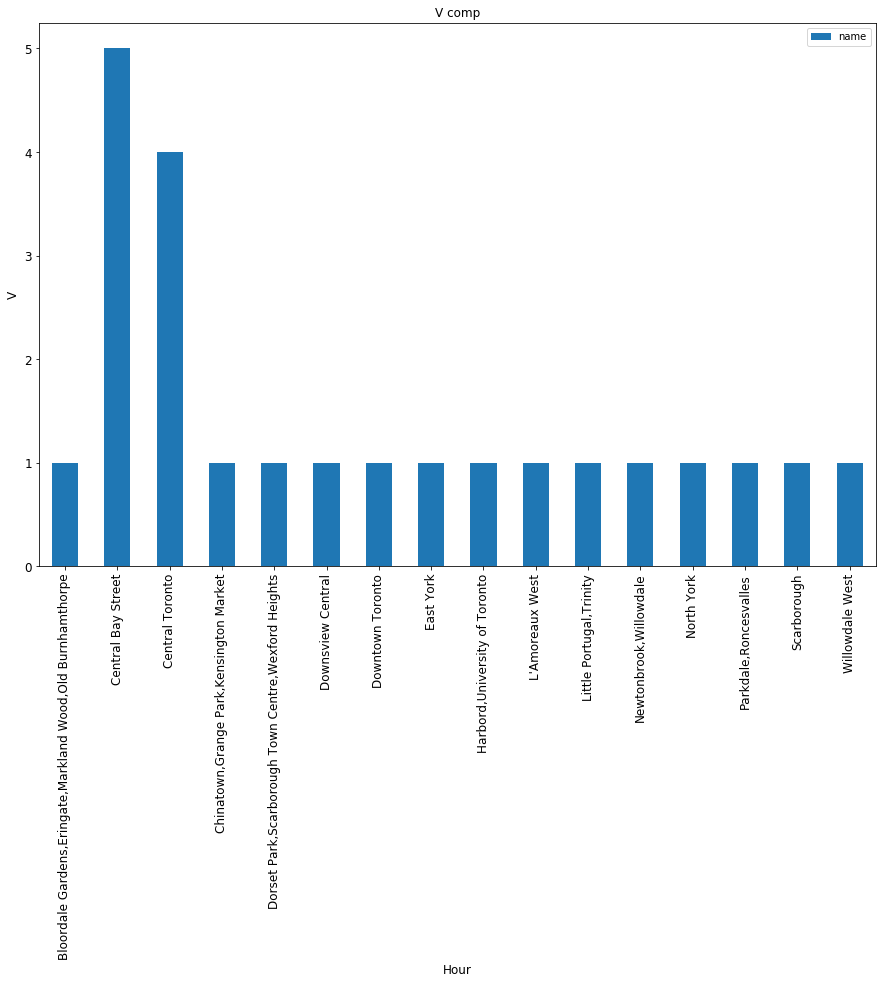

In [60]:
import matplotlib.pyplot as plt
ax = df_neighcount[['name']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()

## Conclusion and Result

The distribution of Hospital in Central Bay Street is maximum followed by Central Toronto
and the distribution is same for rest of the neighborhoods